<a href="https://colab.research.google.com/github/ashishpatel26/Pytorch-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression Basics

**Classification algorithm**
* Example: Spam vs No Spam
  * Input: Bunch of words
  * Output: Probability spam or not

**Basic Comparison**
* Linear regression
  * Output: numeric value given inputs
* Logistic regression:
  * Output: probability [0, 1] given input belonging to a class

**Input/Output Comparison**
* **Linear regression: Multiplication**
 * Input: [1]
   * Output: 2
 * Input: [2]
   * Output: 4
* Trying to model the relationship $y = 2x$
* **Logistic regression: Spam**
* Input: "Sign up to get 1 million dollars by tonight"
  * Output: p = 0.8
* Input: "This is a receipt for your recent purchase with Amazon"
  * Output: p = 0.3
* **p: probability it is spam**


### Problems of Linear Regression¶
* Example
  * Fever
  * Input: temperature
  * Output: fever or no fever
* Remember
  * **Linear regression**: minimize error between points and line

In [6]:
!nvidia-smi

Sun Mar 21 05:33:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

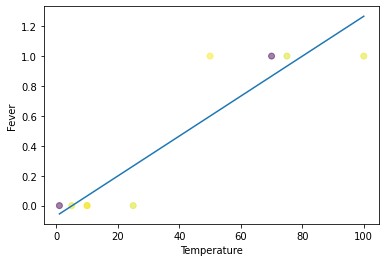

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 5, 10, 10, 25, 50, 70, 75, 100,]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

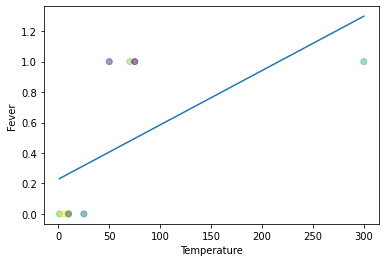

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

### Logistic Regression In-Depth

**Predicting Probability**
* Linear regression doesn't work
* Instead of predicting direct values: **predict probability**
![](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/images/cross_entropy_final_4.png)

In [7]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset

In [8]:
train_dataset = dataset.MNIST(root="./data",
                              train=True,
                              transform = transforms.ToTensor(),
                              download = True)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
len(train_dataset)

60000

In [18]:
type(train_dataset[0])

tuple

In [19]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [20]:
train_dataset[0][1]

5

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [24]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

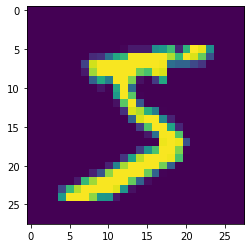

In [28]:
show_img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img)

In [29]:
train_dataset[0][1]

5

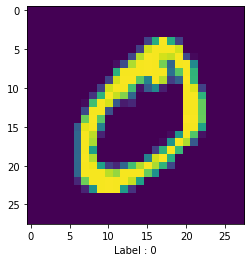

In [32]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(show_img)
plt.xlabel(f'Label : {train_dataset[1][1]}')
plt.show()

### Testing data

In [33]:
test_data = dataset.MNIST(root="./data", train=False, transform=transforms.ToTensor())

In [34]:
len(test_data)

10000

In [35]:
type(test_data)

torchvision.datasets.mnist.MNIST

In [37]:
test_data[0][0].size()

torch.Size([1, 28, 28])

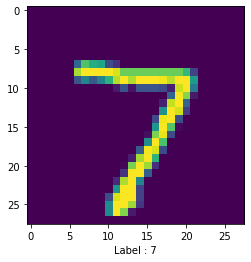

In [38]:
show_img = test_data[0][0].numpy().reshape(28,28)
plt.imshow(show_img)
plt.xlabel(f'Label : {test_data[0][1]}')
plt.show()

In [40]:
print(len(train_dataset))
batch_size = 100
n_iters = 3000

60000


In [41]:
num_epochs = n_iters/(len(train_dataset)/ batch_size)
num_epochs = int(num_epochs)
num_epochs

5

### Train loader

In [42]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size=batch_size, shuffle=True)

In [44]:
img1 = np.ones((28,28))
img2 = np.ones((28,28))
lst = [img1, img2]

In [45]:
for i in lst:
  print(i.shape)

(28, 28)
(28, 28)


In [74]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [46]:
class LogisticRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

In [47]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [48]:
input_dim = 28*28
output_dim = 10

model = LogisticRegression(input_dim, output_dim)
model

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [62]:
criterion = nn.CrossEntropyLoss()

In [63]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [64]:
list(model.parameters())[0].size(), list(model.parameters())[1].size()

(torch.Size([10, 784]), torch.Size([10]))

In [75]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_().to(device)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted.cpu() == labels.cpu()).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.4341588318347931. Accuracy: 90.0
Iteration: 1000. Loss: 0.3633652925491333. Accuracy: 90.08999633789062
Iteration: 1500. Loss: 0.36254143714904785. Accuracy: 90.3499984741211
Iteration: 2000. Loss: 0.46561554074287415. Accuracy: 90.41999816894531
Iteration: 2500. Loss: 0.5440605282783508. Accuracy: 90.5199966430664
Iteration: 3000. Loss: 0.4840767979621887. Accuracy: 90.56999969482422


In [67]:
iter_test = 0
for images, labels in test_loader:
  iter_test += 1
  images = images.view(-1, 28*28).requires_grad_()
  outputs = model(images)
  if iter_test == 1:
    print("OUTPUTS")
    print(outputs.size())
  _, predicted = torch.max(outputs.data, 1)

OUTPUTS
torch.Size([100, 10])


In [78]:
iter_test = 0
for images, labels in test_loader:
  iter_test += 1
  images = images.view(-1, 28*28).requires_grad_().to(device)
  outputs = model(images)
  _, predicted = torch.max(outputs.data, 1)
  if iter_test == 1:
    print("PREDICTIOON")
    print(predicted.cpu().size())


PREDICTIOON
torch.Size([100])
